In [131]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import numpy as np
import datetime
import dateparser 

In [132]:
with open(r'ubereat.html', "r") as f:
    page = f.read()
soup = BeautifulSoup(page)
commandes = soup.find("div", {"class": "ce cf cg c8 ch"})
tab_commandes = commandes.find_all("div", {"class": "g6"})
print("nb de commandes: " + str(len(tab_commandes)))

nb de commandes: 69


In [138]:
vals = {"resto": [], "date": [], "prix": [], "heure": [], "minute": []}
for obj in tab_commandes:
    val = obj.find("div", {"class": "cs f5 bv d7"}).get_text(strip=True).split("•")
    date_et_heure = val[1].replace(u'\xa0', u' ')
    if "Annulée le" in date_et_heure:
        continue
    (date, heure) = date_et_heure.split(" à ")
    (heure, minute) = heure.split(":")
    vals["resto"].append(obj.find("div", {"class": "ag bh f2 g9"}).get_text())
    prix = float(val[0].split("pour")[-1].split("€")[0].strip().replace(",", "."))
    vals["date"].append(dateparser.parse(date))
    vals["heure"].append(datetime.time(int(heure), int(minute)))
    vals["prix"].append(prix)

In [139]:
data = {
    "resto": vals["resto"],
    "date": vals["date"],
    "heure": vals["heure"],
    "prix": vals["prix"]
}
dataF = pd.DataFrame(data)

In [140]:
# for date_string in vals["date"]:
#     print(dateparser.parse(date_string).date())
print(len(vals["prix"]))

68


In [141]:
dataF

,resto,date,heure,prix
0,SMATCH BURGER,2021-01-28,13:12:00,25.52
1,SMATCH BURGER,2021-01-21,20:25:00,21.07
2,Kaiyō,2021-01-18,19:35:00,35.79
3,Sushi Muraguchi,2021-01-13,13:52:00,18.36
4,SMATCH BURGER,2021-12-31,21:29:00,21.07
...,...,...,...,...
63,SMATCH BURGER,2021-03-13,23:23:00,19.40
64,Wan,2021-03-07,22:38:00,17.98
65,Wan,2021-03-02,21:04:00,19.98
66,KFC - Okabe,2021-12-27,16:47:00,21.45


In [142]:
print("somme: ", dataF["prix"].sum())
print("moyenne: ", dataF["prix"].mean())

somme:  1278.4800000000002
moyenne:  18.80117647058824


In [143]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(dataF)

                                       resto       date     heure   prix
0                              SMATCH BURGER 2021-01-28  13:12:00  25.52
1                              SMATCH BURGER 2021-01-21  20:25:00  21.07
2                                      Kaiyō 2021-01-18  19:35:00  35.79
3                            Sushi Muraguchi 2021-01-13  13:52:00  18.36
4                              SMATCH BURGER 2021-12-31  21:29:00  21.07
5                              SMATCH BURGER 2021-12-30  12:54:00  21.07
6      Out-Fry 18 - Korean Chicken by Taster 2021-12-23  13:10:00  61.59
7      Five Pizza Original - Kremlin-Bicetre 2021-12-21  23:02:00   9.84
8                              SMATCH BURGER 2021-12-20  20:51:00  21.07
9                                        Wan 2021-12-18  23:19:00  24.09
10                             SMATCH BURGER 2021-12-13  12:34:00  17.24
11                         Subway® - Tolbiac 2021-12-11  12:18:00  15.08
12                 Bozen - Charenton-le-Pont 2021-1

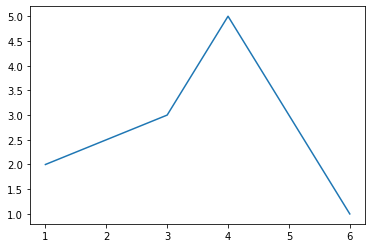

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 3, 4, 6])
y = np.array([2, 3, 5, 1])
plt.plot(x, y)

plt.show() # affiche la figure a l'ecran